## Ejercicio 7.23
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_7.23.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

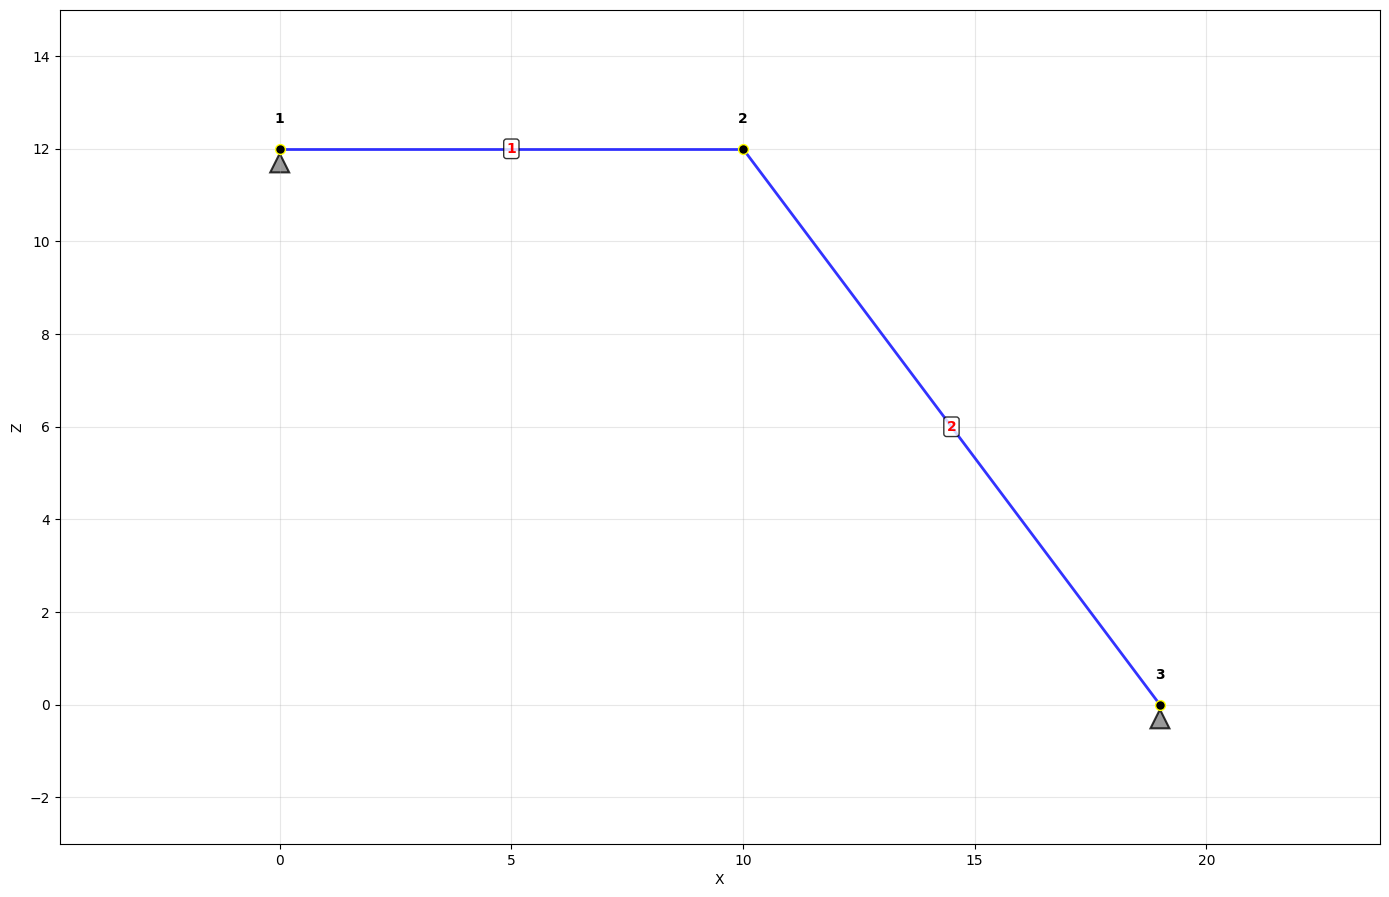

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 30 * 10**6
A = 35000 * 10**-6
I = 152 * 10**-6

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=12)
system.defineNode(2, x=10, z=12)
system.defineNode(3, x=19, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 3, 2, A=A, E=E, I=I)

# Asignación de Cargas
system.assignElement.uniformLoad(1, w=12)
system.assignElement.gravityPointLoad(2, P=75)
system.assignJoint.displacement(3, ux=0, uz=-50/1000, ry=0)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 3
Número de elementos: 2
Grados de libertad totales: 9
Grados de libertad restringidos (desplazamientos conocidos): 6 de 9
GL restringidos: [0 1 2 6 7 8]
Grados de libertad libres (fuerzas conocidas): 3 de 9
GL libres: [3 4 5]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (3x3):
  |         3 |          4 |          5 |

  |     130203 |     -33598 |         49 |
  |     -33598 |      44815 |       -100 |
  |         49 |       -100 |       2280 |
 
KAB (3x6):
  |         0 |          1 |          2 |          6 |          7 |          8 |
 
  |    -105000 |          0 |          0 |     -25203 |      33598 |          0 |
  |          0 |  

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 1
PROPIEDADES
  Longitud: 10.000
  Área (A): 3.5000e-02
  Módulo elástico (E): 3.0000e+07
  Momento de inercia (I): 1.5200e-04
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  1) Carga uniforme: w=12.000 en toda la longitud

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 105000.000 |      0.000 |      0.000 | -105000.000 |      0.000 |      0.000 |
  |      0.000 |     13.680 |      0.000 |      0.000 |  

In [5]:
system.getInfoNodes()

Node 1: (0, 12) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=-6.6392e-02
  Fuerzas: Fx=94.171, Fz=46.707, My=0.000

Node 2: (10, 12) - Libre
  Desplazamientos: Ux=-8.9687e-04, Uz=-5.3264e-02, Ry=7.1551e-03
  Fuerzas: Fx=0.000, Fz=0.000, My=0.000

Node 3: (19, 0) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=-5.0000e-02, Ry=6.5483e-02
  Fuerzas: Fx=-94.171, Fz=148.293, My=0.000


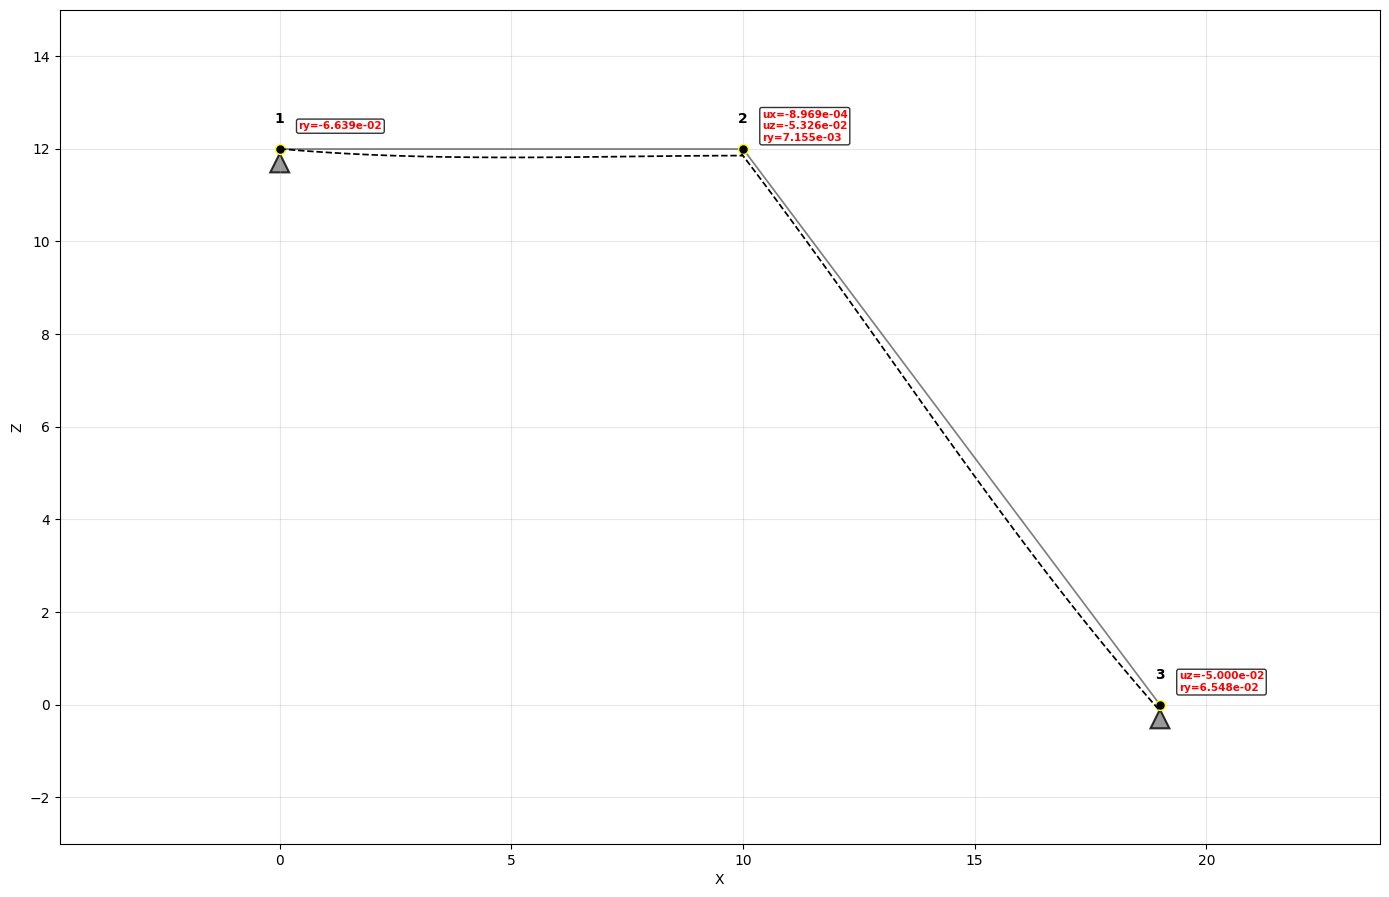

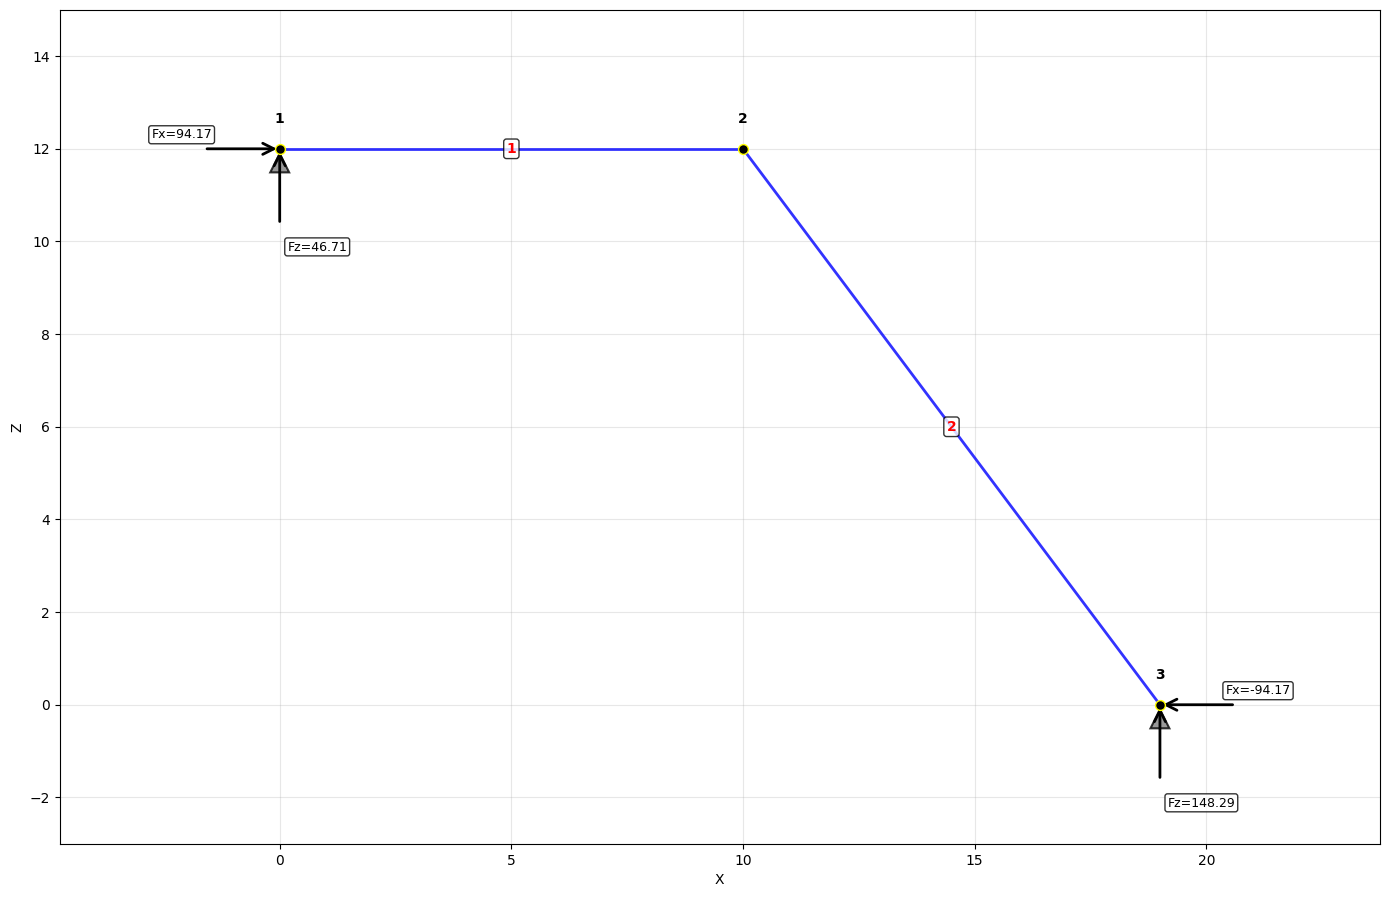

In [6]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.05)
plotter.showReactions()